In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import metrics
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
3,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
4,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0


In [3]:
dict1={'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}
dict2={'mon':1,'tue':2,'wed':3,'thu':4,'fri':5,'sat':6,'sun':7}

In [4]:
for i in range(12):
    df['month'][df['month']==list(dict1.keys())[i]]=dict1[list(dict1.keys())[i]]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [5]:
for i in range(7):
    df['day'][df['day']==list(dict2.keys())[i]]=dict2[list(dict2.keys())[i]]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [6]:
df[['month','day']].head()

,month,day
0,3,5
1,10,2
2,3,5
3,8,7
4,8,1


In [7]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
3,8,6,8,7,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
4,8,6,8,1,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0


In [8]:
df[df['rain']!=0]

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
2,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
192,7,4,8,7,91.8,175.1,700.7,13.8,21.9,73,7.6,1.0,0.00
225,7,6,7,3,91.2,183.1,437.7,12.5,12.6,90,7.6,0.2,0.00
428,7,5,8,2,96.1,181.1,671.2,14.3,27.3,63,4.9,6.4,10.82
429,8,6,8,2,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0.00
430,7,5,8,2,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0.00
431,4,4,8,2,96.1,181.1,671.2,14.3,20.7,69,4.9,0.4,0.00
438,5,4,8,5,91.0,166.9,752.6,7.1,21.1,71,7.6,1.4,2.17


In [332]:
from sklearn.linear_model import LinearRegression

In [333]:
lr = LinearRegression()

In [9]:
list1=df.columns

In [10]:
list1

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

In [11]:
X = df[list1[0:12]]
Y = df[list1[12]]

In [12]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=.2,random_state=42)

In [346]:
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [456]:
p_lr = lr.predict(X_test)

In [457]:
metrics.mean_squared_error(Y_test,p_lr)

294.94561854922409

In [13]:
import math

In [350]:
from sklearn.preprocessing import PolynomialFeatures

In [351]:
poly = PolynomialFeatures(degree=1)

In [352]:
X_train_new = poly.fit_transform(X_train)
X_test_new = poly.fit_transform(X_test)

In [375]:
lr1 = LinearRegression()

In [376]:
lr1.fit(X_train_new,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [377]:
p_plr = lr1.predict(X_test_new)

In [378]:
math.sqrt(metrics.mean_squared_error(Y_test,p_plr))

17.173980859114295

In [357]:
from sklearn.neural_network import MLPRegressor

In [449]:
mlpr = MLPRegressor(max_iter=80)

In [450]:
mlpr.fit(X_train,Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=80, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [451]:
p_mlpr = mlpr.predict(X_test)

In [479]:
p_mlpr

array([ 11.55855901,  10.32365877,   8.47584877,  10.50618558,
        10.88915611,   9.59194714,  11.02684991,   6.10720996,
         9.82987287,  11.10083802,   7.04090508,  11.78185911,
        10.1895064 ,  10.41738712,   7.78258205,   8.99425547,
        10.84050235,  10.34905939,  10.2492867 ,   9.79577141,
        11.66753692,   6.53642461,  12.16016508,  10.73821185,
         8.88740079,  10.74907222,   6.86126209,  10.82954631,
        10.75474537,   9.95430851,   9.72183658,   9.45002256,
         8.66216547,  12.15273001,   9.80254805,  10.14494882,
         7.10890706,   9.84485453,   6.50910547,  10.17166502,
         9.51233638,   9.37422591,   8.80011492,  11.77010703,
         8.509766  ,  11.96370708,   5.7188505 ,  11.04403833,
         9.02867054,  10.6522974 ,  10.0489712 ,  11.35324941,
        11.42800882,   9.43891412,   9.50617527,   7.42080077,
         5.39190185,  11.83917782,  10.64663988,   9.49780108,
         8.400025  ,  11.05477694,  10.5824167 ,   9.78

In [452]:
metrics.mean_squared_error(Y_test,p_mlpr)

271.94411801032521

In [453]:
math.sqrt(metrics.mean_squared_error(Y_test,p_mlpr))

16.490728243783693

In [363]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
3,8,6,8,7,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
4,8,6,8,1,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0


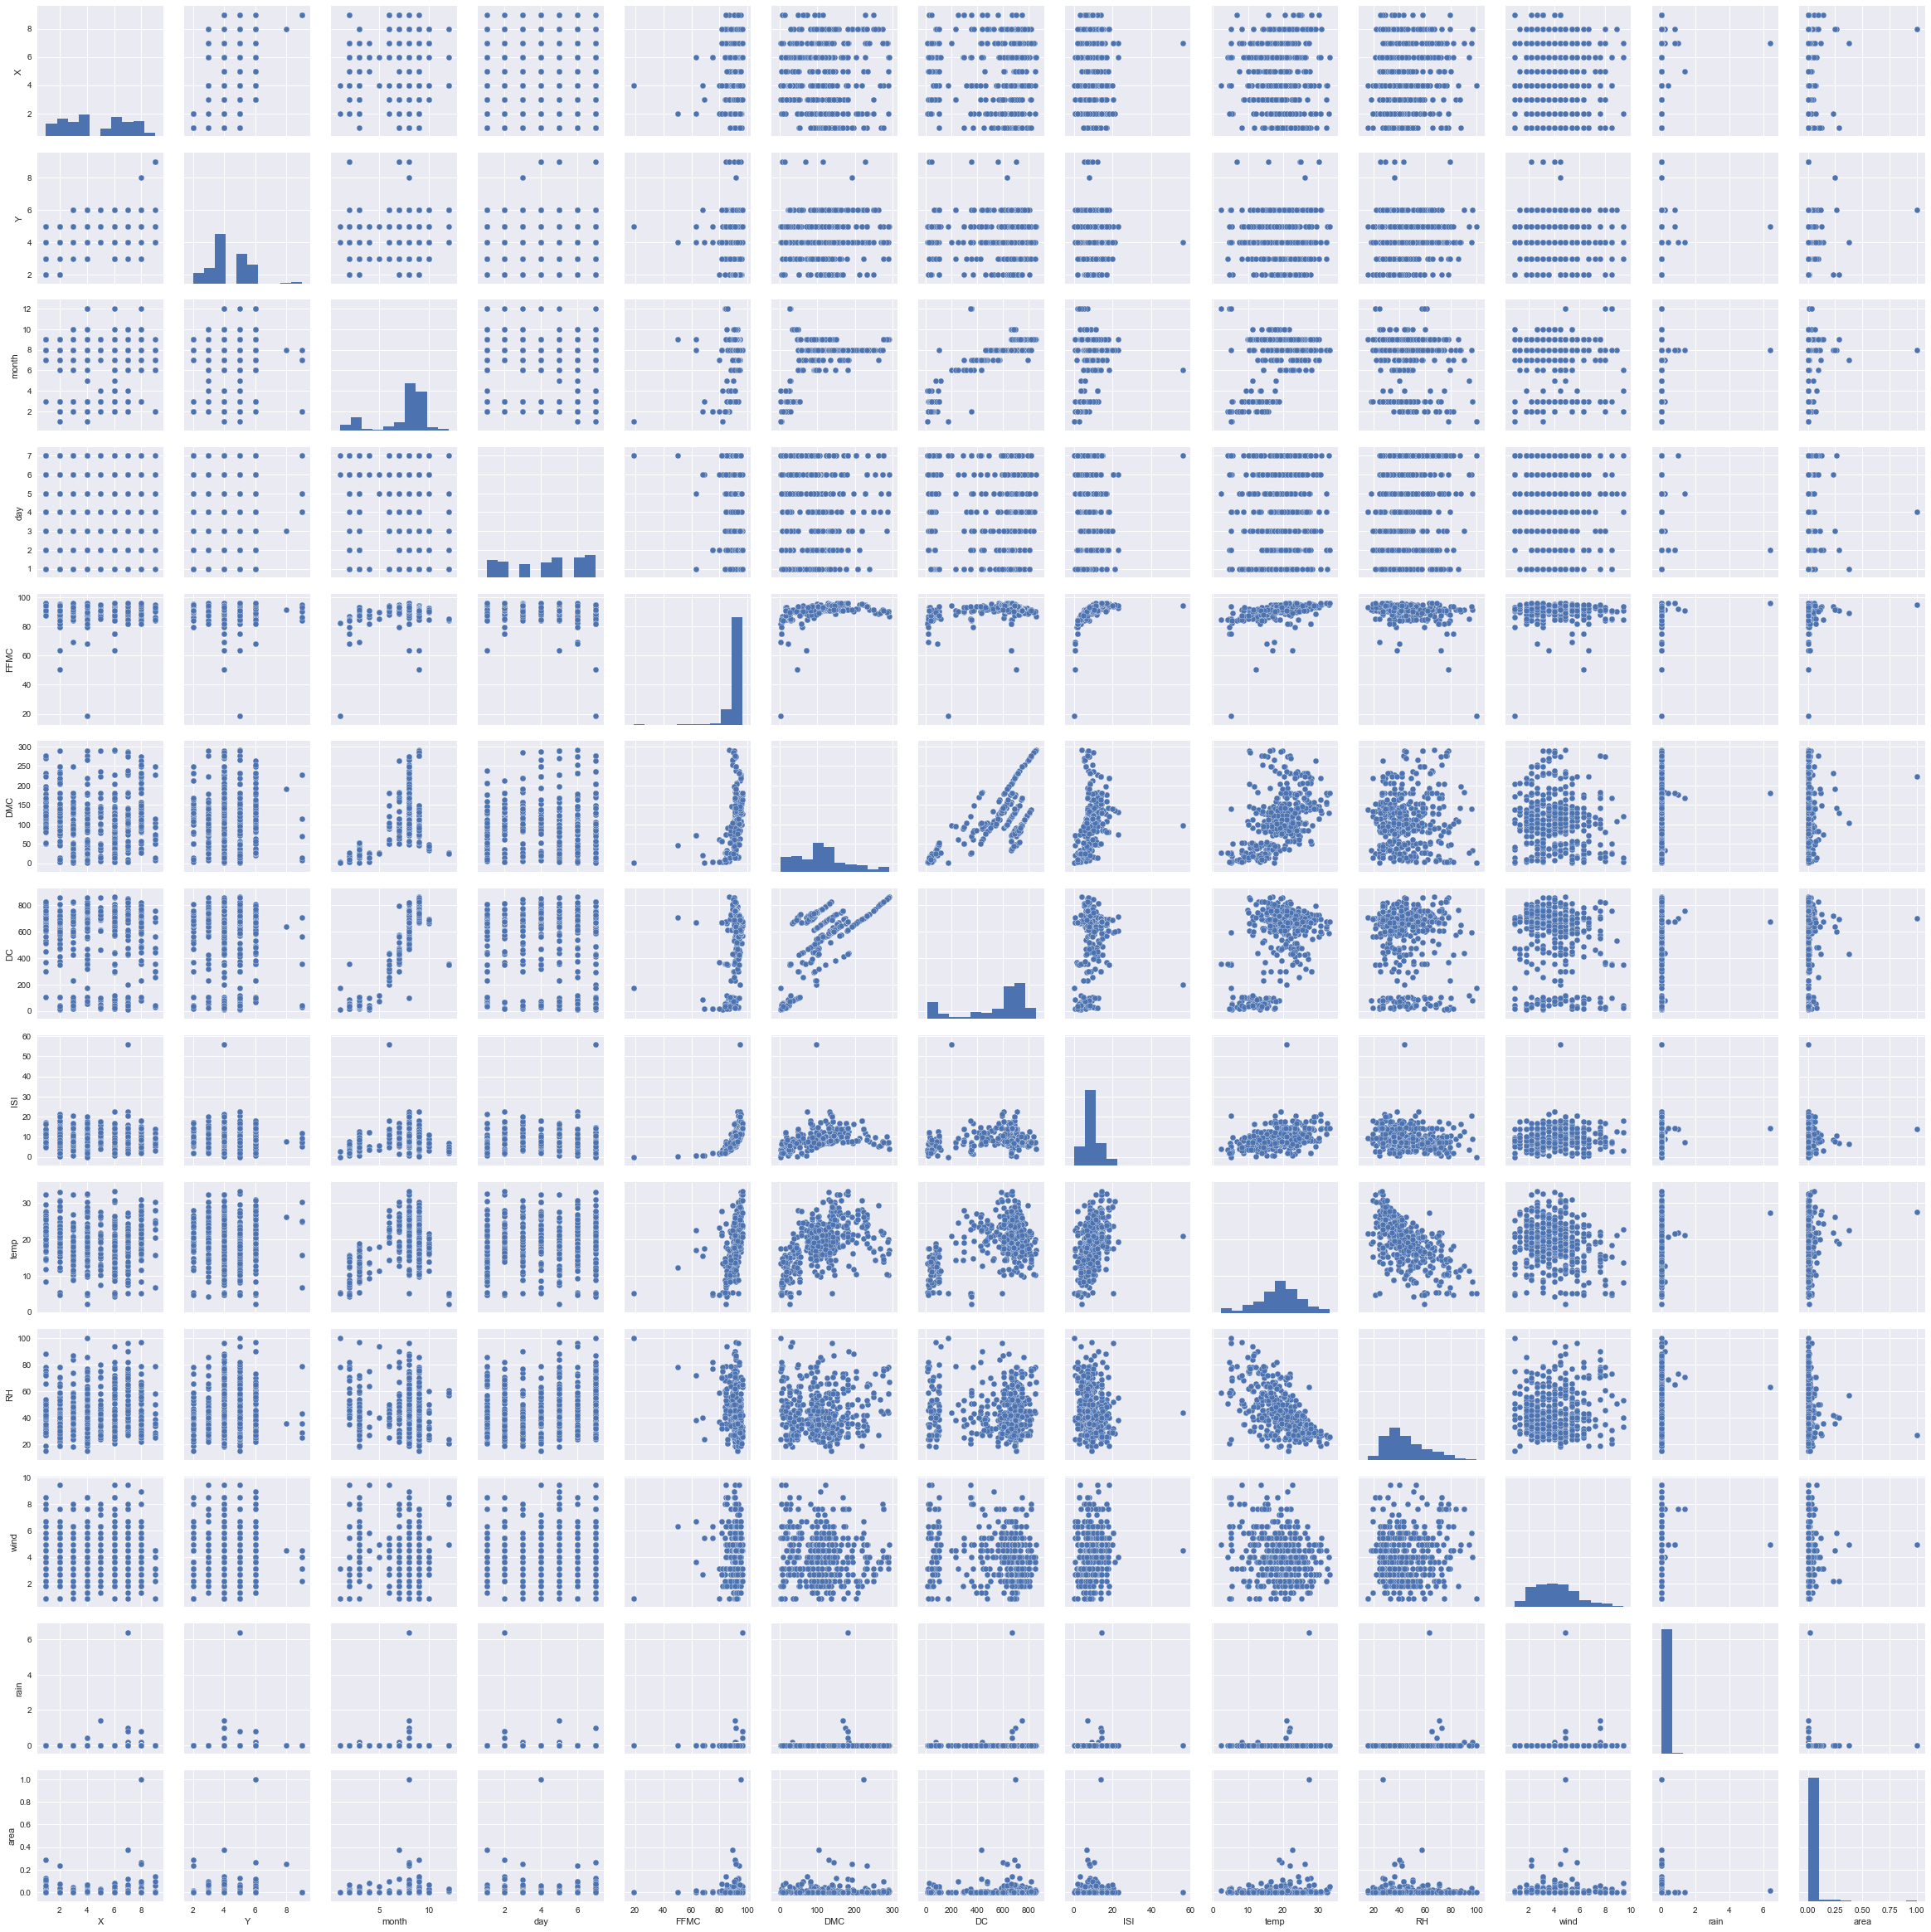

In [296]:
#sb.pairplot(df)

In [294]:
#df['area']/=df['area'].max()

In [318]:
df['area']

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
5      0.000000
6      0.000000
7      0.000000
8      0.000000
9      0.000000
10     0.000000
11     0.000000
12     0.000000
13     0.000000
14     0.000000
15     0.000000
16     0.000000
17     0.000000
18     0.000000
19     0.000000
20     0.000000
21     0.000000
22     0.000000
23     0.000000
24     0.000000
25     0.000000
26     0.000000
27     0.000000
28     0.000000
29     0.000000
         ...   
420    0.000000
421    0.000000
422    0.058048
423    0.011510
424    0.000000
425    0.003712
426    0.019671
427    0.054323
428    0.014499
429    0.000000
430    0.000000
431    0.000000
432    0.002613
433    0.066450
434    0.007772
435    0.000000
436    0.000000
437    0.000000
438    0.002908
439    0.000576
440    0.000000
441    0.008629
442    0.072747
443    0.014954
444    0.000000
445    0.000000
446    0.000000
447    0.000000
448    0.000000
449    0.000000
Name: area, Length: 450,

In [341]:
from sklearn.preprocessing import MinMaxScaler

In [342]:
scalar = MinMaxScaler()

In [343]:
scalar.fit(X)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [344]:
X = scalar.transform(X)
print(X)

[[ 0.75        0.42857143  0.18181818 ...,  0.42352941  0.68235294  0.        ]
 [ 0.75        0.28571429  0.81818182 ...,  0.21176471  0.          0.        ]
 [ 0.875       0.57142857  0.18181818 ...,  0.96470588  0.36470588  0.03125   ]
 ..., 
 [ 0.          0.14285714  0.18181818 ...,  0.67058824  0.25882353  0.        ]
 [ 0.25        0.28571429  0.63636364 ...,  0.84705882  0.42352941  0.        ]
 [ 0.25        0.28571429  0.63636364 ...,  0.24705882  0.25882353  0.        ]]


In [366]:
plt.scatter(X_test['X'],Y_test)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [369]:
lr.coef_

array([ 18.66046353,  -3.80157771,  19.7955051 ,  -4.06119464,
       -22.57429978,  31.70018546, -24.97400627, -27.30831836,
        27.2152202 ,  -8.61198702,  12.65398884, -22.57964801])

In [469]:
coeff=list(lr.coef_)
coeff

[18.660463534237643,
 -3.8015777073887609,
 19.795505104586137,
 -4.0611946358084836,
 -22.574299776107338,
 31.700185456944702,
 -24.974006269528708,
 -27.308318364970027,
 27.215220197023879,
 -8.611987023831432,
 12.653988839123453,
 -22.579648011215774]

In [458]:
df['rain'].size

450

In [460]:
df['rain'][df['rain'] == 0].size

442

In [461]:
p_df = df.copy(deep=True)

In [462]:
p_df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
3,8,6,8,7,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
4,8,6,8,1,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0


In [467]:
#p_df.drop(['rain','area'],inplace=True,axis=1)

In [468]:
p_df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9
2,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0
3,8,6,8,7,92.3,85.3,488.0,14.7,22.2,29,5.4
4,8,6,8,1,92.3,88.9,495.6,8.5,24.1,27,3.1


In [470]:
for i in range(11):
    p_df[list1[i]]=p_df[list1[i]]*coeff[i]

In [471]:
p_df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind
0,130.623245,-19.007889,59.3865,-20.306,-1945.904641,830.544859,-2355.048791,-139.272424,223.164806,-439.211338,84.781725
1,130.623245,-15.206311,197.955,-8.12239,-2045.231560,1122.186565,-16710.107595,-182.965733,489.873964,-284.195572,11.388590
2,149.283708,-22.809466,59.3865,-20.306,-2070.063289,1055.616176,-1935.485486,-245.774865,225.886328,-835.362741,50.615955
3,149.283708,-22.809466,158.364,-28.4284,-2083.607869,2704.025819,-12187.315060,-401.432280,604.177888,-249.747624,68.331540
4,149.283708,-22.809466,158.364,-4.06119,-2083.607869,2818.146487,-12377.117507,-232.120706,655.886807,-232.523650,39.227365


In [505]:
list_fin=[]
for i in range(p_df['X'].size):
    su=0
    for j in range(11):
        su+=p_df[list1[j]][i]
    list_fin.append(su)

In [506]:
list_fin

[-3590.2499056466499,
 -17293.801745126882,
 -3589.0131390815613,
 -11289.157664522711,
 -11131.331984756436,
 -16347.185020138309,
 -17684.053976414099,
 -15667.757568058758,
 -14864.87116731519,
 -14741.065152730296,
 -2810.0297482390779,
 -2743.5166029246839,
 -3561.1370300512035,
 -14982.72378821836,
 -17444.850104183566,
 -5147.5297766117674,
 -11627.80552172118,
 -12393.380488425071,
 -12617.447115821524,
 -14832.949977789447,
 -16366.232603799885,
 -17009.039853431419,
 -17077.417094700933,
 -17383.677360620637,
 -17313.564178385197,
 -17599.404120478972,
 -17084.902073189416,
 -17848.758014437313,
 -2807.830875670149,
 -8527.9760042152593,
 -14379.001877739316,
 -15067.100312416947,
 -16571.799619345624,
 -17947.481670370609,
 -16369.506205550508,
 -15290.373714149682,
 -10934.149810598303,
 -2960.2324038131405,
 -14301.167281046393,
 -14686.780583495554,
 -14686.780583495554,
 -14791.725640954615,
 -14846.937024607247,
 -17651.161527114436,
 -17921.752007388332,
 -2799.1810006

In [507]:
pre_lr = lr.predict(X)
pre_lr = list(pre_lr)

In [508]:
pre_lr

[8.7838005833916331,
 7.8293599131527092,
 -0.95780861731373967,
 19.237579579528628,
 24.928744891090613,
 15.019053005058158,
 2.4879814428959177,
 17.87591381523734,
 16.950576630820457,
 24.317129673291788,
 8.5039274670926872,
 12.1038009146021,
 6.5336672208424851,
 15.258439361834697,
 6.7020601757583016,
 -0.61634326083069446,
 21.58126588594984,
 19.995958432417758,
 14.86135585171292,
 24.787495325396709,
 12.810119257038757,
 9.7353824244361213,
 9.0827707814623935,
 6.0994648384799275,
 12.023289292451793,
 10.277404734884316,
 15.548902024819549,
 3.3714323949698923,
 5.1852987734271458,
 20.314705426603624,
 9.6763327727223043,
 2.94929409950766,
 3.0183259224054533,
 -0.67978334095062287,
 11.235070832442233,
 7.5466554367625838,
 13.457018570304495,
 8.8564442209490135,
 7.7222354282468437,
 11.112693450877476,
 11.112693450877476,
 7.5969543599461229,
 17.67596626642927,
 5.7564181981934528,
 -5.784781191716446,
 -8.2274104755014417,
 -0.42274902704249318,
 -6.95527142

In [509]:
len(pre_lr)

450

In [510]:
theta0_li = []
for i in range(450):
    theta0_li.append(pre_lr[i]-list_fin[i])
theta0 = sum(theta0_li)/450
theta0_li

[3599.0337062300414,
 17301.631105040036,
 3588.0553304642476,
 11308.395244102239,
 11156.260729647527,
 16362.204073143368,
 17686.541957856996,
 15685.633481873996,
 14881.821743946011,
 14765.382282403589,
 2818.5336757061705,
 2755.6204038392862,
 3567.6706972720458,
 14997.982227580194,
 17451.552164359324,
 5146.9134333509364,
 11649.386787607131,
 12413.376446857488,
 12632.308471673237,
 14857.737473114843,
 16379.042723056924,
 17018.775235855854,
 17086.499865482398,
 17389.776825459117,
 17325.587467677648,
 17609.681525213855,
 17100.450975214237,
 17852.129446832285,
 2813.0161744435763,
 8548.2907096418621,
 14388.678210512038,
 15070.049606516455,
 16574.817945268031,
 17946.801887029658,
 16380.741276382951,
 15297.920369586445,
 10947.606829168608,
 2969.0888480340896,
 14308.889516474641,
 14697.893276946432,
 14697.893276946432,
 14799.322595314561,
 14864.612990873677,
 17656.917945312631,
 17915.967226196615,
 2790.9535901807699,
 3092.5694059675643,
 3415.2409508

In [511]:
theta0

12042.729725718189

In [512]:
list_fin = [list_fin[i]+theta0 for i in range(450)]

In [513]:
list_fin

[8452.4798200715395,
 -5251.0720194086934,
 8453.7165866366267,
 753.57206119547845,
 911.39774096175279,
 -4304.4552944201205,
 -5641.3242506959105,
 -3625.0278423405689,
 -2822.1414415970012,
 -2698.3354270121072,
 9232.6999774791111,
 9299.213122793506,
 8481.5926956669864,
 -2939.9940625001709,
 -5402.1203784653771,
 6895.1999491064216,
 414.92420399700859,
 -350.65076270688223,
 -574.71739010333476,
 -2790.2202520712581,
 -4323.5028780816956,
 -4966.31012771323,
 -5034.6873689827444,
 -5340.947634902448,
 -5270.834452667008,
 -5556.6743947607829,
 -5042.1723474712271,
 -5806.0282887191242,
 9234.8988500480409,
 3514.7537215029297,
 -2336.2721520211271,
 -3024.3705866987584,
 -4529.0698936274348,
 -5904.7519446524202,
 -4326.7764798323187,
 -3247.6439884314932,
 1108.5799151198862,
 9082.497321905048,
 -2258.4375553282043,
 -2644.0508577773653,
 -2644.0508577773653,
 -2748.9959152364263,
 -2804.2072988890577,
 -5608.4318013962475,
 -5879.0222816701425,
 9243.5487250619171,
 8949.73

In [514]:
count = 0
for i in range(450):
    if list_fin[i]>0:
        count+=1
count

156

In [14]:
from sklearn.tree import DecisionTreeRegressor

In [15]:
from sklearn.ensemble import AdaBoostRegressor

In [20]:
from sklearn.grid_search import GridSearchCV

In [89]:
params = {'n_estimators':[i for i in range(150,500,50)]}

In [90]:
params['n_estimators']

[150, 200, 250, 300, 350, 400, 450]

In [91]:
dtr = AdaBoostRegressor(DecisionTreeRegressor(),n_estimators=315)

In [92]:
grd = GridSearchCV(dtr,params,cv=5)

In [96]:
grd.fit(X,Y)

GridSearchCV(cv=5, error_score='raise',
       estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=315,
         random_state=None),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [150, 200, 250, 300, 350, 400, 450]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [94]:
p_grd = grd.predict(X_test)

In [95]:
math.sqrt(metrics.mean_squared_error(Y_test,p_grd))

25.25800420554221

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=50,
         random_state=None)

In [74]:
dtr.fit(X,Y)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=315,
         random_state=None)

In [75]:
p_dtr = dtr.predict(X_test)

In [76]:
math.sqrt(metrics.mean_squared_error(Y_test,p_dtr))

5.537702428439166

In [77]:
df_te = pd.read_csv('test.csv')

In [78]:
df_te.head()

,Id,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,Id_1,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0
1,Id_2,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0
2,Id_3,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0
3,Id_4,6,5,sep,fri,93.3,141.2,713.9,13.9,22.9,44,5.4,0
4,Id_5,7,4,sep,mon,90.9,126.5,686.5,7.0,19.4,48,1.3,0


In [79]:
df_te.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
df_te.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)

In [80]:
df_te.head()

,Id,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,Id_1,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0
1,Id_2,8,6,8,1,91.5,145.4,608.2,10.7,8.0,86,2.2,0
2,Id_3,8,6,9,2,91.0,129.5,692.6,7.0,13.1,63,5.4,0
3,Id_4,6,5,9,5,93.3,141.2,713.9,13.9,22.9,44,5.4,0
4,Id_5,7,4,9,1,90.9,126.5,686.5,7.0,19.4,48,1.3,0


In [97]:
predic = grd.predict(df_te[list1[0:12]])

In [98]:
sol1 = pd.DataFrame({'Id':df_te['Id'],'area':predic},columns=['Id','area'])
sol1.head()

,Id,area
0,Id_1,5.80
1,Id_2,5.23
2,Id_3,5.23
3,Id_4,1.12
4,Id_5,0.33


In [99]:
sol1['area'].value_counts()

0.00     24
2.13      4
7.19      3
5.23      3
1.94      2
0.43      2
9.96      2
1.19      2
1.36      2
1.69      2
28.66     1
1.07      1
2.01      1
0.68      1
4.53      1
11.32     1
2.44      1
8.24      1
23.41     1
2.93      1
11.16     1
0.52      1
5.80      1
0.90      1
1.12      1
7.40      1
2.64      1
1.90      1
0.33      1
1.46      1
0.61      1
Name: area, dtype: int64

In [100]:
sol1.to_csv('Answer_try.csv',index=False)

In [101]:
sol1.head()

,Id,area
0,Id_1,5.80
1,Id_2,5.23
2,Id_3,5.23
3,Id_4,1.12
4,Id_5,0.33
